# RV notebook to show the entire results directory

The examples below show how to use the rv machinery. The initialization block below (between "####") is mandatory.

You must select "Cell|Run All" from the above menu to re-run the notebook , and wait for it to finish running.

This particular notebook is built for the example results directory that can be downloaded from Dropbox, use this link to download example-reduction-dir from Dropbox:
https://www.dropbox.com/sh/hde4azjdscsw20c/AAB2M0w3Ttm4ioPI0bccOPE-a?dl=0

Then do "cd example-reduction-dir; run-rv-notebook.sh" inside your copy of the results directory to start the notebook server and point your browser to the port indicated by the script.

In [1]:
%matplotlib inline
from raviz import DirList, DataDir

In [2]:
# dirs is a directory list object
# By default displays all directories under your results directory 
# dirs.show() will have the same effect
dirs = DirList('../data/')
dirs[0].fullpath

'../data/'

In [3]:
root = dirs[0]
root

#,name,ext,size,modified
0,results-dirty,.fits,16.0M,16:07:23 May 07
1,results.dirty,.fits,1.0M,16:07:23 May 07
2,results.model,.fits,1.0M,16:07:23 May 07
3,results.residual,.fits,1.0M,16:07:23 May 07
4,results.restored,.fits,1.0M,16:07:23 May 07
5,pillars,.jpg,11k,13:00:20 May 08


In [4]:
root.fits  # gives list of FITS files in directory #0 above

#,name,size,modified
0,results-dirty,16.0M,16:07:23 May 07
1,results.dirty,1.0M,16:07:23 May 07
2,results.model,1.0M,16:07:23 May 07
3,results.residual,1.0M,16:07:23 May 07
4,results.restored,1.0M,16:07:23 May 07


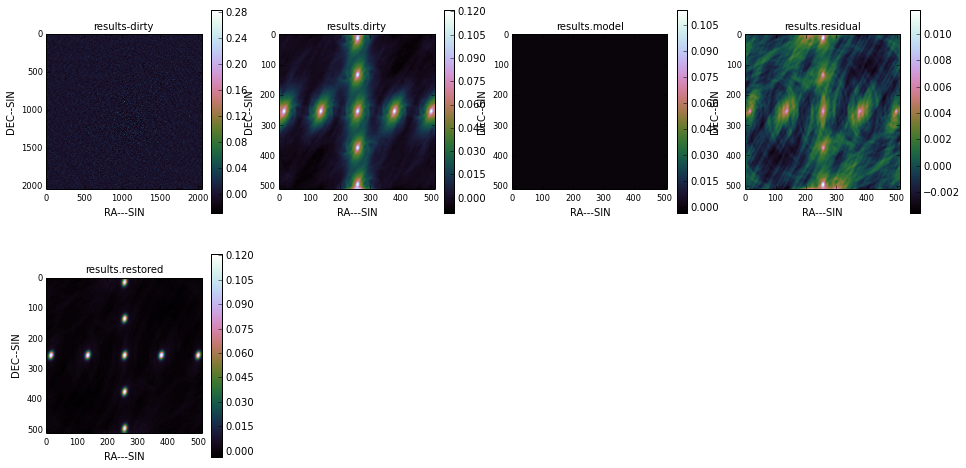

In [5]:
# displays thumbnails for all FITS files in directory #0
root.fits.thumbs()

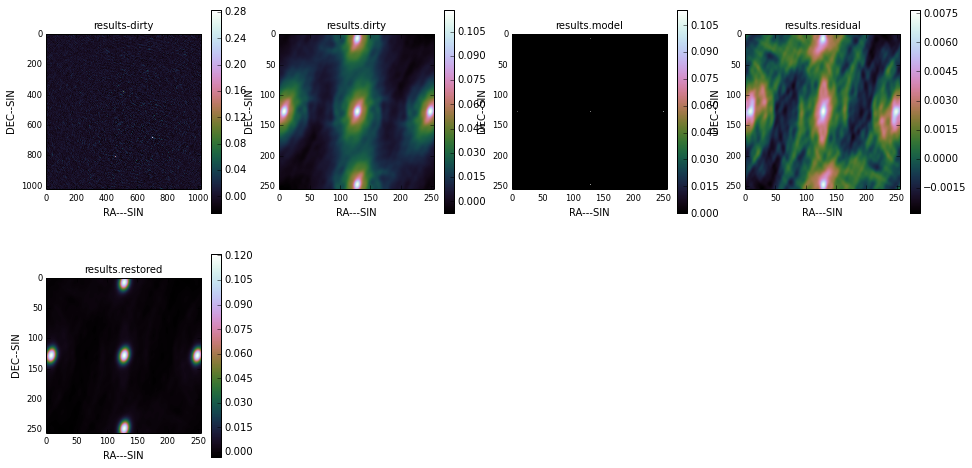

In [6]:
root.fits.thumbs(zoom=2)

In [7]:
# gives list of FITS files matching the pattern
root.fits("*restored*")

#,name,size,modified
0,results.restored,1.0M,16:07:23 May 07


#,name,size,modified
0,results.restored,1.0M,16:07:23 May 07


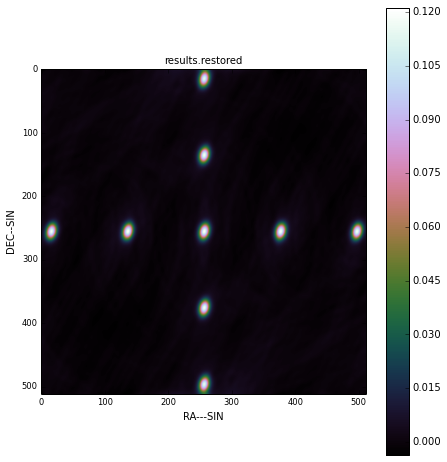

In [8]:
root.fits("*restored*").show()
root.fits("*restored*").thumbs()

In [9]:
# list of images (PNG, JPG, etc.) in directory #3
root.images

#,name,size,modified
0,pillars,11k,13:00:20 May 08


In [10]:
# clickable thumbnails of same
root.images.thumbs(ncol=6)

pillars.jpg
""


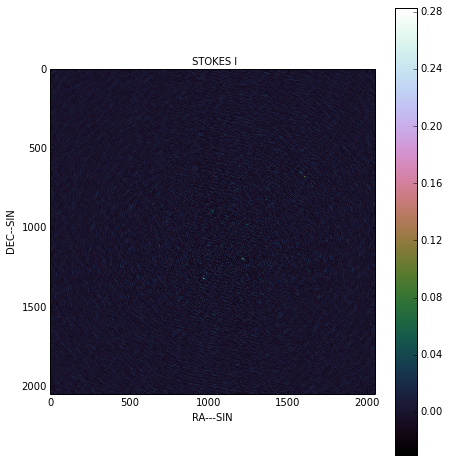

In [11]:
# first FITS file in directory #0. Stokes axis is unrolled by default, but this can be controlled by
# invoking dirs[0].fits[0].show() with some extra arguments
root.fits[0]

'results-dirty.fits (RA,DEC) zoom x4'

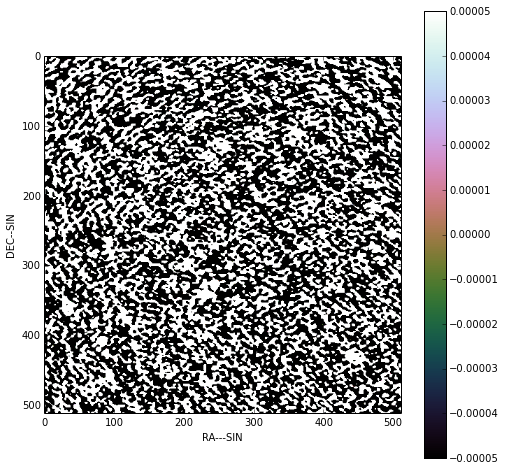

In [12]:
# and this shows how to invoke show() with some explicit arguments to control the rendering
root.fits[0].show(unroll=None,vmin=-5e-5,vmax=5e-5,zoom=4)

In [13]:
# just some info about the given file
root.fits[0].info()

results-dirty.fits 2048x2048x1x1 RA---SIN,DEC--SIN,STOKES,FREQ


/usr/local/lib/python2.7/site-packages/aplpy/labels.py:432: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if self.coord == x or self.axis.apl_tick_positions_world[ipos] > 0:


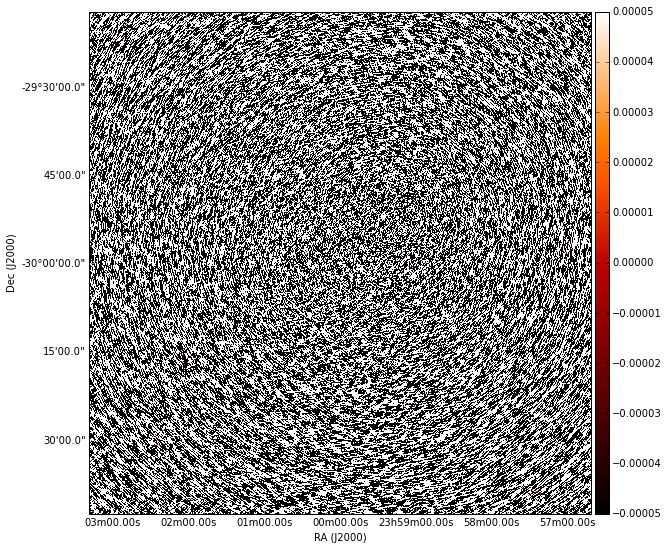

In [14]:
# A more elaborate rendering of the same file using aplpy. Note that .fullpath gives you the path to the file.
# aplpy is quite slow so we don't use it by default for all files, but this example shows you how to do
# a proper rendering
import aplpy
import matplotlib.pyplot as plt

fig = aplpy.FITSFigure(dirs[0].fits[0].fullpath,slices=[0,0])
fig.show_colorscale(cmap='gist_heat',vmin=-5e-5,vmax=5e-5)
fig.add_colorbar()